In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
%config IPCompleter.greedy=True

## UPLOAD DATASETS

In [28]:
path = '../../'

In [29]:
name_df = 'df_tablon.pickle'

In [30]:
df = pd.read_pickle( path + '/02_Data/03_Work/' + name_df)

In [31]:
df

,date,store_id,item_id,year_2013,year_2014,year_2015,month_1,month_2,month_3,month_4,...,sales_maxm_6,sales_maxm_7,sales_maxm_8,sales_maxm_9,sales_maxm_10,sales_maxm_11,sales_maxm_12,sales_maxm_13,sales_maxm_14,sales_maxm_15
0,2013-01-16,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
1,2013-01-17,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
2,2013-01-18,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
3,2013-01-19,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,281.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0,351.0
4,2013-01-20,CA_3,FOODS_3_090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20975,2015-11-26,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,17.0,17.0,17.0,17.0,17.0
20976,2015-11-27,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20977,2015-11-28,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
20978,2015-11-29,CA_4,FOODS_3_714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0


###  x and y

In [32]:
target = 'sales'
x = df.drop(columns = ['date','store_id','item_id','sales']).copy()
y =  df[target].copy()

### Mutual Information

#### function to show results

In [33]:
def ranking_mi(mutual_selector, mode = 'table'):
    # ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importance_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importance_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])

    if mode == 'table':
        return(ranking_mi)
    else:
        g = ranking_mi.importance_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importance_mi').variable)
        return(g)

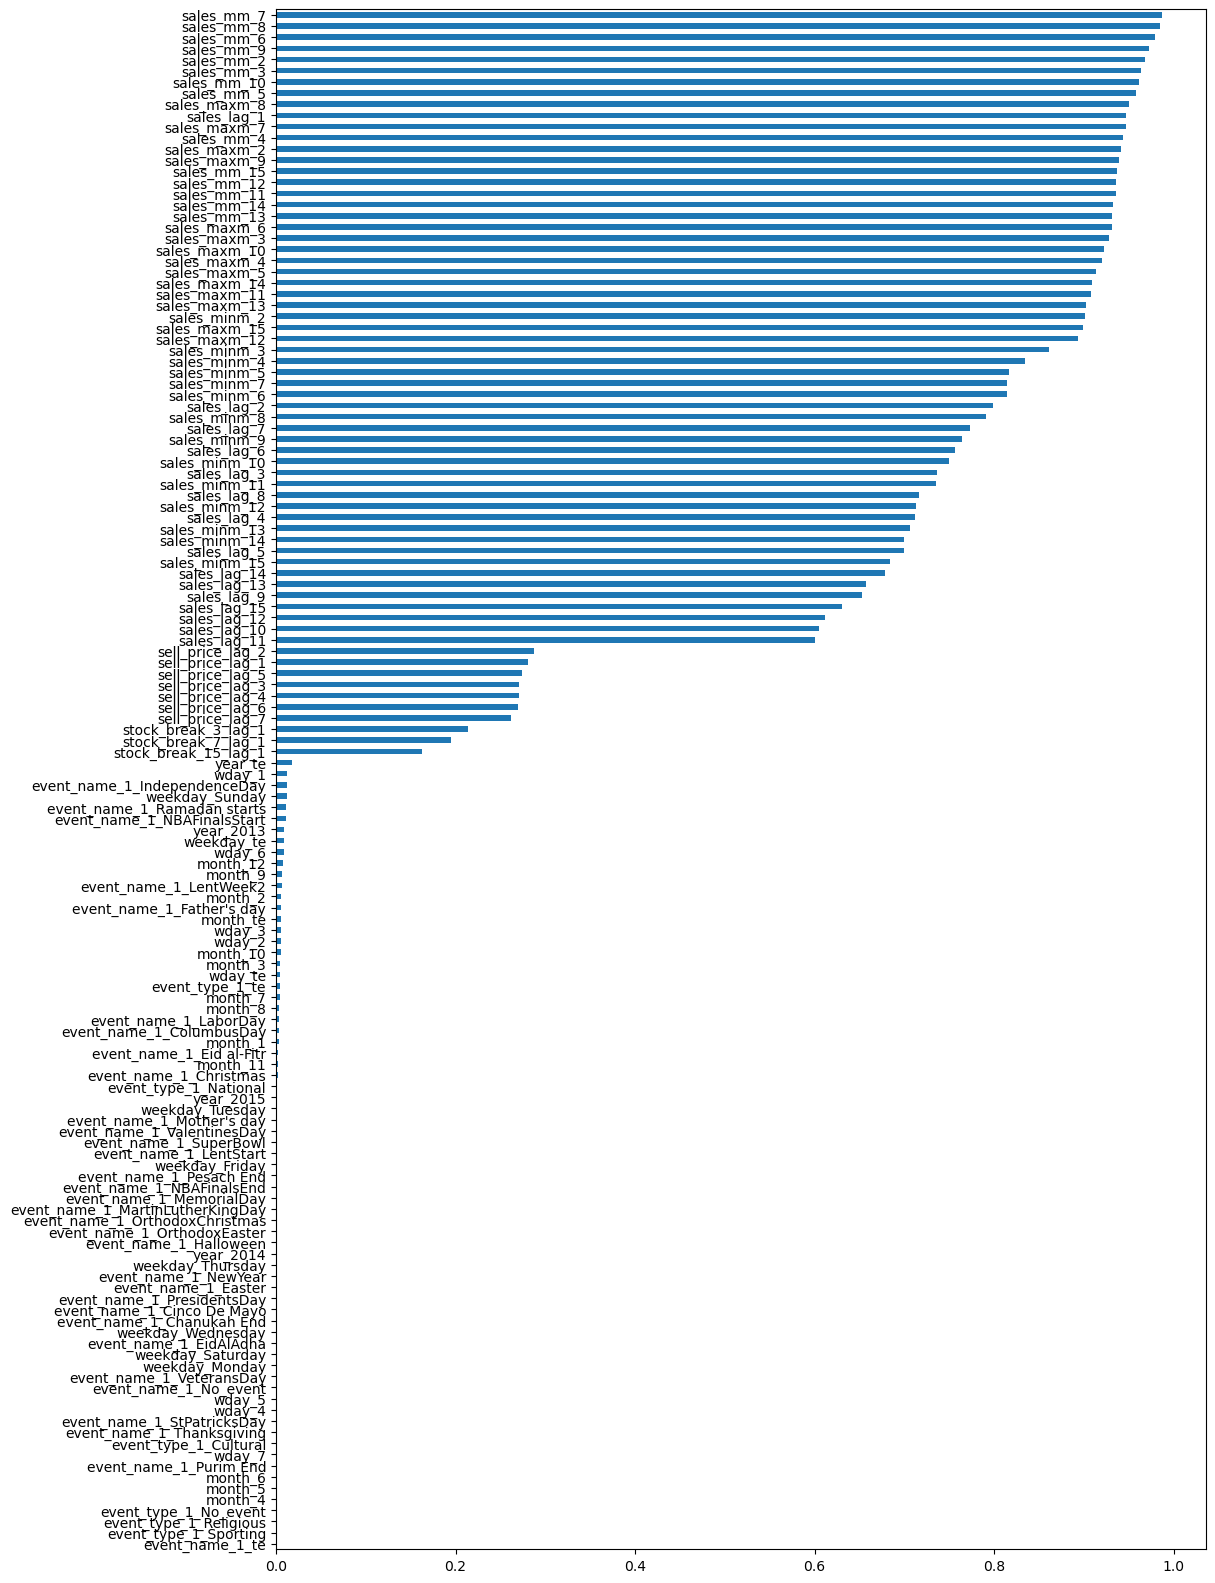

In [34]:
mutual_selector = mutual_info_regression(x,y)
rank_mi = ranking_mi(mutual_selector, mode = 'plot')

#### Select variables

look at the year 2014.

In [35]:
ranking_mi(mutual_selector).reset_index().iloc[60:100]

,index,variable,importance_mi,ranking_mi
60,73,sell_price_lag_3,0.271195,60
61,74,sell_price_lag_4,0.270675,61
62,76,sell_price_lag_6,0.269661,62
63,77,sell_price_lag_7,0.261236,63
64,78,stock_break_3_lag_1,0.214242,64
65,79,stock_break_7_lag_1,0.195228,65
66,80,stock_break_15_lag_1,0.162540,66
67,65,year_te,0.017433,67
68,15,wday_1,0.012440,68
69,38,event_name_1_IndependenceDay,0.012276,69


In [36]:
lim_position_variable = 72

In [37]:
in_mi = ranking_mi(mutual_selector).iloc[0:lim_position_variable].variable

##### Datasets with selection

In [38]:
x_mi = x[in_mi].copy()

In [39]:
x_selected = x_mi

add the slicer variables that we'll need as well.

In [40]:
x_selected = pd.concat([df[['date','store_id','item_id']], x_selected], axis=1)

## SAVE DATASETS AFTER VARIABLES SELECTION

In [41]:
name_x_selected = path + '/02_Data/03_Work/' + 'x_selected.pickle'
name_y_selected = path + '/02_Data/03_Work/' + 'y_selected.pickle'

In [42]:
x_selected.to_pickle(name_x_selected)
y_selected = y.copy()
y_selected.to_pickle(name_y_selected)

In [43]:
names_final_variables = path + '/05_Results/' + 'final_variables.pickle'
x_selected.iloc[0].to_pickle(names_final_variables)